In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# load data

In [2]:
book_meta = pd.read_csv('../data/collaborative_book_metadata.csv',index_col=0)
book_meta.head(3)

,book_id,title,image_url,url,num_pages,ratings_count,description,genre,name,book_id_mapping
0,5899779,Pride and Prejudice and Zombies Pride and Prej...,https://images.gr-assets.com/books/1320449653m...,https://www.goodreads.com/book/show/5899779-pr...,320,105537,The New York Times Best Seller is now a major ...,"['fantasy, paranormal', 'romance', 'fiction', ...",Jane Austen,808
1,872333,Blue Bloods Blue Bloods 1,https://images.gr-assets.com/books/1322281515m...,https://www.goodreads.com/book/show/872333.Blu...,302,117633,"When the Mayflower set sail in 1620, it carrie...","['young-adult', 'fantasy, paranormal', 'romanc...",Melissa de la Cruz,217
2,15507958,Me Before You Me Before You 1,https://images.gr-assets.com/books/1357108762m...,https://www.goodreads.com/book/show/15507958-m...,369,609327,Louisa Clark is an ordinary young woman living...,"['romance', 'fiction']",Jojo Moyes,385


In [218]:
book_meta.isna().value_counts()

book_id  title  image_url  url    num_pages  ratings_count  description  genre  name   book_id_mapping
False    False  False      False  False      False          False        False  False  False              96
dtype: int64

In [102]:
book_meta[book_meta['book_id'] == 19057]

,book_id,title,image_url,url,num_pages,ratings_count,description,genre,name,book_id_mapping
20,19057,I Am the Messenger,https://images.gr-assets.com/books/1398483261m...,https://www.goodreads.com/book/show/19057.I_Am...,360,94968,protect the diamonds\nsurvive the clubs\ndig d...,"['young-adult', 'fiction', 'mystery, thriller,...",Markus Zusak,455


In [3]:
book_df = pd.read_csv('../data/collaborative_books_df.csv',index_col=0)
book_df.head(3) # map uesr with books

,title,book_id,user_id_mapping,book_id_mapping,Predicted Rating,Actual Rating
0,I Am the Messenger,19057,1537,299,4.5,5
1,I Am the Messenger,19057,23039,299,4.9,3
2,I Am the Messenger,19057,39096,299,3.9,3


In [232]:
len(book_df['book_id_mapping'].unique())

898

In [230]:
len(book_df['book_id'].unique()) # in the trasaction data, there are 898 books

898

In [236]:
book_df.shape

(196296, 6)

In [231]:
len(book_meta['book_id'].unique()) # yet in the book meta, there are only 96 books

96

# customer segmentation

(array([4.6335e+04, 1.3646e+04, 4.8160e+03, 1.5260e+03, 4.4000e+02,
        1.1000e+02, 2.6000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

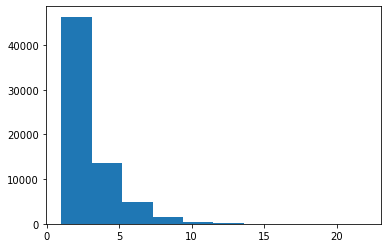

In [42]:
plt.hist(book_df['user_id_mapping'].value_counts())

In [4]:
feq = pd.DataFrame(book_df['user_id_mapping'].value_counts())

(array([2.7955e+04, 1.3646e+04, 4.8160e+03, 1.5260e+03, 4.4000e+02,
        1.1000e+02, 2.6000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 <BarContainer object of 10 artists>)

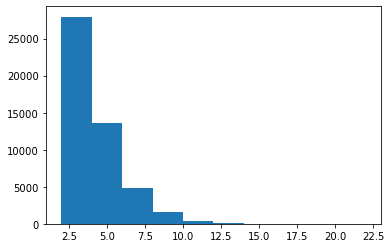

In [43]:
plt.hist(feq[feq['user_id_mapping'] > 1]['user_id_mapping'])

In [46]:
feq[feq['user_id_mapping'] > 1]['user_id_mapping'].describe()

count    48529.000000
mean         3.666179
std          1.831928
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         22.000000
Name: user_id_mapping, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8dafc3460>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8dafc3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8dafc3100>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8dafcf220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8dafcf580>],
 'means': []}

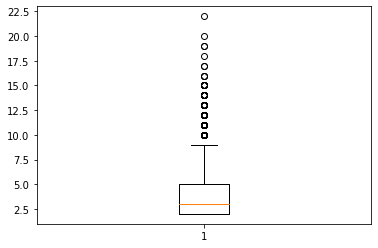

In [45]:
plt.boxplot(feq[feq['user_id_mapping'] > 1]['user_id_mapping'])

In [5]:
feq['user_id'] = feq.index
feq.head(3)

,user_id_mapping,user_id
3716,22,3716
9826,20,9826
5224,19,5224


In [6]:
feq['user_seg'] = [None] * len(feq)

In [7]:
# category customers into new(just 1 books), normal(1-5) , vip
feq['user_seg']  = np.where((feq['user_id_mapping'] == 1), 'new', feq['user_seg'] )
feq['user_seg']  = np.where(((feq['user_id_mapping'] > 1) & (feq['user_id_mapping'] <= 5)) , 'normal',feq['user_seg'])
feq['user_seg']  = np.where((feq['user_id_mapping'] > 5) , 'vip',feq['user_seg'])

In [8]:
feq['user_seg'].value_counts()

normal    41601
new       18380
vip        6928
Name: user_seg, dtype: int64

<AxesSubplot:xlabel='user_seg', ylabel='Count'>

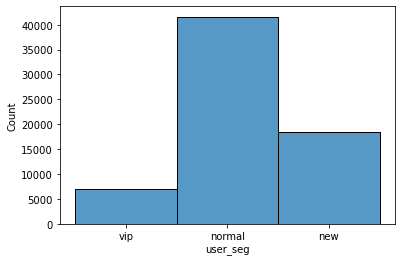

In [97]:
sns.histplot(feq['user_seg'])

In [9]:
# category customers into new(just 1 books), normal(1-5) , vip
feq['user_subseg'] = [None] * len(feq)
feq['user_subseg']  = np.where((feq['user_id_mapping'] == 1), 'new', feq['user_subseg'] )
feq['user_subseg']  = np.where(((feq['user_id_mapping'] > 1) & (feq['user_id_mapping'] <= 3)) , 'lazy',feq['user_subseg'])
feq['user_subseg']  = np.where(((feq['user_id_mapping'] > 3) & (feq['user_id_mapping'] <= 5)) , 'active',feq['user_subseg'])
feq['user_subseg']  = np.where((feq['user_id_mapping'] > 5) , 'vip',feq['user_subseg'])

<AxesSubplot:xlabel='user_subseg', ylabel='Count'>

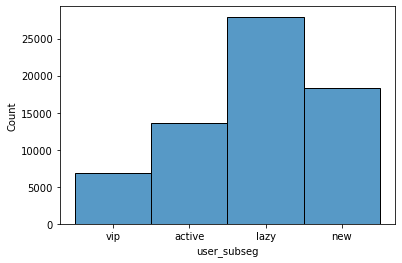

In [101]:
sns.histplot(feq['user_subseg'])

In [10]:
feq['user_subseg'].value_counts()

lazy      27955
new       18380
active    13646
vip        6928
Name: user_subseg, dtype: int64

# master

In [11]:
book_meta['genre'] = book_meta['genre'].str.replace('[','')
book_meta['genre'] = book_meta['genre'].str.replace(']','')
book_meta['genre'] = book_meta['genre'].str.replace('\'','')
book_meta['genre'] = book_meta['genre'].str.replace('`','')

C:\Users\hanr\AppData\Local\Temp\ipykernel_17276\2787029173.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  book_meta['genre'] = book_meta['genre'].str.replace('[','')
C:\Users\hanr\AppData\Local\Temp\ipykernel_17276\2787029173.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  book_meta['genre'] = book_meta['genre'].str.replace(']','')


In [220]:
book_meta['genre'] = book_meta['genre'].str.split(', ')

In [221]:
book_meta = book_meta.explode('genre')

In [222]:
book_meta.isna().value_counts()

book_id  title  image_url  url    num_pages  ratings_count  description  genre  name   book_id_mapping
False    False  False      False  False      False          False        False  False  False              553
dtype: int64

In [226]:
master = book_df[['book_id', 'user_id_mapping','title','Actual Rating']]
master.head(2)

,book_id,user_id_mapping,title,Actual Rating
0,19057,1537,I Am the Messenger,5
1,19057,23039,I Am the Messenger,3


In [227]:
master.isna().value_counts()

book_id  user_id_mapping  title  Actual Rating
False    False            False  False            196296
dtype: int64

In [238]:
master = master.merge(book_meta[['book_id','num_pages','ratings_count','genre','description','name']], on = 'book_id', how = 'left')
master.head(3)

,book_id,user_id_mapping,title,Actual Rating,num_pages,ratings_count,genre,description,name
0,19057,1537,I Am the Messenger,5,360.0,94968.0,young-adult,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak
1,19057,1537,I Am the Messenger,5,360.0,94968.0,fiction,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak
2,19057,1537,I Am the Messenger,5,360.0,94968.0,mystery,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak


In [239]:
master = master.dropna()

In [240]:
master.isna().value_counts()

book_id  user_id_mapping  title  Actual Rating  num_pages  ratings_count  genre  description  name 
False    False            False  False          False      False          False  False        False    99451
dtype: int64

In [ ]:
master = master.merge(feq,on = 'user_id_mapping', how = 'left')
master

In [242]:
master.isna().value_counts()

book_id  user_id_mapping  title  Actual Rating  num_pages  ratings_count  genre  description  name   feq    user_seg  user_subseg
False    False            False  False          False      False          False  False        False  False  False     False          99451
dtype: int64

In [244]:
master.to_csv('../output/master.csv')

# EDA

In [12]:
master = pd.read_csv("../output/master.csv",index_col=0)

In [13]:
master.head()

,book_id,user_id_mapping,title,Actual Rating,num_pages,ratings_count,genre,description,name,feq,user_seg,user_subseg
0,19057,1537,I Am the Messenger,5,360.0,94968.0,young-adult,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip
1,19057,1537,I Am the Messenger,5,360.0,94968.0,fiction,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip
2,19057,1537,I Am the Messenger,5,360.0,94968.0,mystery,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip
3,19057,1537,I Am the Messenger,5,360.0,94968.0,thriller,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip
4,19057,1537,I Am the Messenger,5,360.0,94968.0,crime,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip


In [323]:
master['genre'].value_counts()

fiction               16914
young-adult           12370
paranormal            11743
fantasy               11743
romance                9649
thriller               4741
crime                  4741
mystery                4741
children               4421
biography              3674
historical fiction     3674
history                3674
non-fiction            2395
graphic                1986
comics                 1986
poetry                  999
Name: genre, dtype: int64

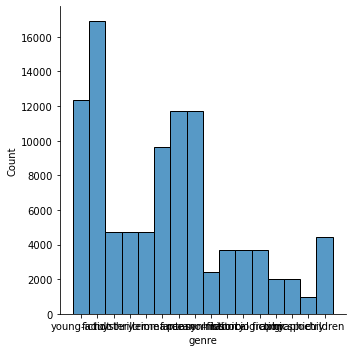

In [333]:
sns.displot(master['genre'])

##  user_df

In [41]:
user_df = master.groupby('user_id_mapping').agg(
        mean_num_pages = ('num_pages','mean'),
    mean_num_rating = ('Actual Rating','mean'),
    mean_rating_count = ('ratings_count', 'mean')
)

In [42]:
user_df.head()

,mean_num_pages,mean_num_rating,mean_rating_count
user_id_mapping,,,
0,224.258065,3.870968,1.899387e+05
1,254.000000,4.000000,2.083940e+05
3,283.000000,4.000000,9.843800e+04
4,528.000000,4.000000,8.386600e+04
7,503.000000,4.000000,1.128913e+06


In [47]:
feq.columns = ['amount','user_id_mapping','user_seg','user_subseg']

In [48]:
user_df = user_df.merge(feq[['user_id_mapping','amount']], on = 'user_id_mapping',how = 'left')
user_df.head()

,user_id_mapping,mean_num_pages,mean_num_rating,mean_rating_count,amount
0,0,224.258065,3.870968,1.899387e+05,7
1,1,254.000000,4.000000,2.083940e+05,10
2,3,283.000000,4.000000,9.843800e+04,4
3,4,528.000000,4.000000,8.386600e+04,2
4,7,503.000000,4.000000,1.128913e+06,5


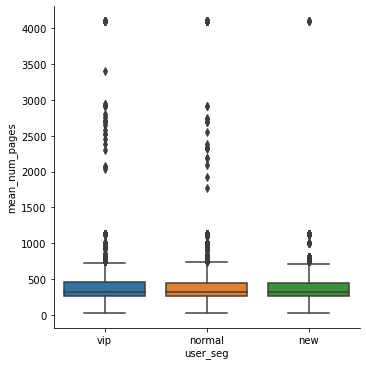

In [265]:
sns.catplot(
    data=user_df, x="user_seg", y="mean_num_pages",
    kind="box", dodge=False,
)

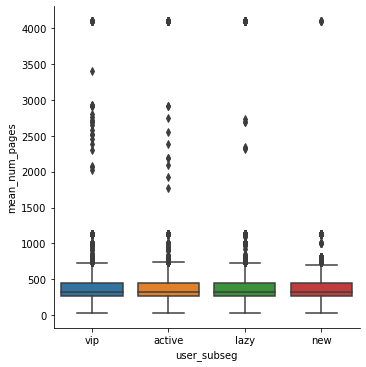

In [269]:
sns.catplot(
    data=user_df, x="user_subseg", y="mean_num_pages",
    kind="box", dodge=False,
)

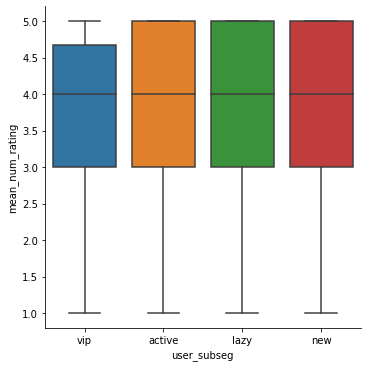

In [270]:
sns.catplot(
    data=user_df, x="user_subseg", y="mean_num_rating",
    kind="box", dodge=False,
)

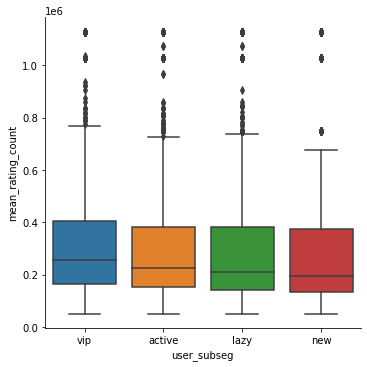

In [272]:

sns.catplot(
    data=user_df, x="user_subseg", y="mean_rating_count",
    kind="box", dodge=False,
)

## genre EDA

In [280]:
master.groupby('user_seg')

In [283]:
feq['user_seg'].value_counts()

normal    41601
new       18380
vip        6928
Name: user_seg, dtype: int64

In [296]:
df = feq.groupby('user_subseg').agg(count = ('user_id_mapping','nunique'))
df['subseg_per'] = df['count'] / sum(df['count'])
df

,count,subseg_per
user_subseg,,
active,13646,0.203949
lazy,27955,0.417806
new,18380,0.274701
vip,6928,0.103544


In [302]:
master.groupby(['user_subseg','genre'])['genre'].size().reset_index(name='count').merge(df.drop('count',axis = 1),on = 'user_subseg',how = 'left')

,user_subseg,genre,count,subseg_per
0,active,biography,1123,0.203949
1,active,children,1404,0.203949
2,active,comics,597,0.203949
3,active,crime,1412,0.203949
4,active,fantasy,3540,0.203949
...,...,...,...,...
59,vip,paranormal,2960,0.103544
60,vip,poetry,251,0.103544
61,vip,romance,2333,0.103544
62,vip,thriller,1161,0.103544


In [303]:
genre_df = master.groupby(['user_subseg','genre'])['genre'].size().reset_index(name='count').merge(df.drop('count',axis = 1),on = 'user_subseg',how = 'left')

In [305]:
genre_df['normalized_count'] = genre_df['count'] * genre_df['subseg_per']
genre_df.head()

,user_subseg,genre,count,subseg_per,normalized_count
0,active,biography,1123,0.203949,229.034330
1,active,children,1404,0.203949,286.343900
2,active,comics,597,0.203949,121.757342
3,active,crime,1412,0.203949,287.975489
4,active,fantasy,3540,0.203949,721.978209


<AxesSubplot:xlabel='genre', ylabel='normalized_count'>

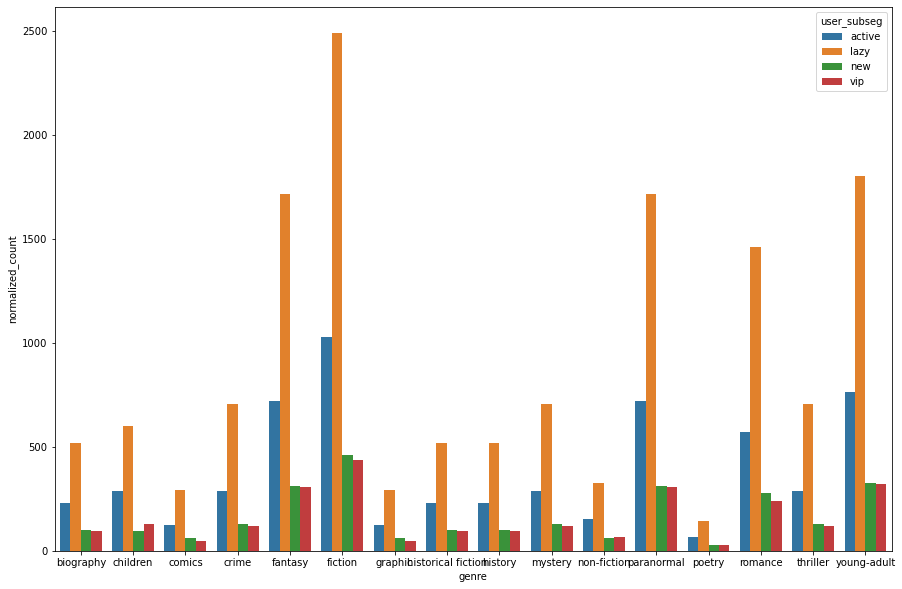

In [322]:
f, axs = plt.subplots(1, 1, figsize=(15,10))
sns.barplot(data = genre_df, x = 'genre',y ='normalized_count',hue = 'user_subseg')

d:\Program Files\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


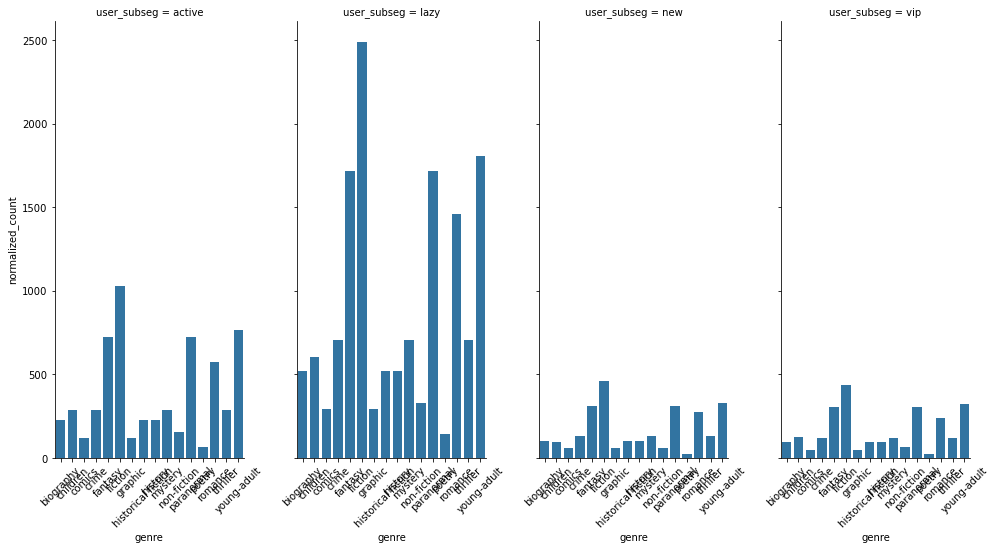

In [317]:
g = sns.FacetGrid(genre_df, col="user_subseg", height=7, aspect=.5)
g.map(sns.barplot, "genre", "normalized_count", )
g.set_xticklabels(rotation=45)

## Genre preference

In [15]:
master.head(2)

,book_id,user_id_mapping,title,Actual Rating,num_pages,ratings_count,genre,description,name,feq,user_seg,user_subseg
0,19057,1537,I Am the Messenger,5,360.0,94968.0,young-adult,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip
1,19057,1537,I Am the Messenger,5,360.0,94968.0,fiction,protect the diamonds\nsurvive the clubs\ndig d...,Markus Zusak,8,vip,vip


(array([ 4837.,     0., 12303.,     0.,     0., 42680.,     0., 69813.,
            0., 66663.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

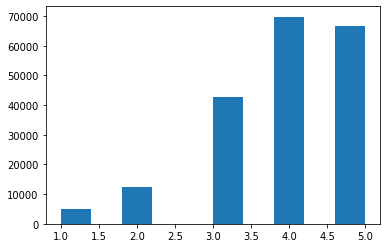

In [30]:
plt.hist(book_df['Actual Rating'])

In [39]:
a = master.groupby(['user_id_mapping','genre']).agg(num_genre = ('genre','count')).reset_index()
a = a.pivot(index = "user_id_mapping",columns='genre',values='num_genre').add_prefix('num_').reset_index()
a = a.fillna(0)
a

genre,user_id_mapping,num_biography,num_children,num_comics,num_crime,num_fantasy,num_fiction,num_graphic,num_historical fiction,num_history,num_mystery,num_non-fiction,num_paranormal,num_poetry,num_romance,num_thriller,num_young-adult
0,0,3.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0,1.0,2.0,3.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15034,83971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15035,84075,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15036,84107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15037,84228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [40]:
b = master.groupby(['user_id_mapping','genre']).agg(rank_genre = ('Actual Rating','mean')).reset_index()
b = b.pivot(index = "user_id_mapping",columns='genre',values='rank_genre').add_prefix('rating_').reset_index()
b =  b.fillna(0)
b.head()

genre,user_id_mapping,rating_biography,rating_children,rating_comics,rating_crime,rating_fantasy,rating_fiction,rating_graphic,rating_historical fiction,rating_history,rating_mystery,rating_non-fiction,rating_paranormal,rating_poetry,rating_romance,rating_thriller,rating_young-adult
0,0,4.0,3.0,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.5,4.0,4.0,0.0,4.0,3.5,4.0
1,1,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
3,4,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0
4,7,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0


In [52]:
user_df = user_df.merge(a, on = 'user_id_mapping', how = 'left').merge(b, on = 'user_id_mapping', how = 'left')
user_df.columns

Index(['user_id_mapping', 'mean_num_pages', 'mean_num_rating',
       'mean_rating_count', 'amount', 'num_biography', 'num_children',
       'num_comics', 'num_crime', 'num_fantasy', 'num_fiction', 'num_graphic',
       'num_historical fiction', 'num_history', 'num_mystery',
       'num_non-fiction', 'num_paranormal', 'num_poetry', 'num_romance',
       'num_thriller', 'num_young-adult', 'rating_biography',
       'rating_children', 'rating_comics', 'rating_crime', 'rating_fantasy',
       'rating_fiction', 'rating_graphic', 'rating_historical fiction',
       'rating_history', 'rating_mystery', 'rating_non-fiction',
       'rating_paranormal', 'rating_poetry', 'rating_romance',
       'rating_thriller', 'rating_young-adult'],
      dtype='object')

In [53]:
user_df.to_csv('../output/user_df.csv')